In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/imdb_top.csv')
data = data.drop(columns=['Poster_Link'])
data.head()

    


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [119]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   IMDB_Rating    1000 non-null   float64
 4   Overview       1000 non-null   object 
 5   Meta_score     1000 non-null   float64
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          1000 non-null   float64
 13  Family         1000 non-null   int64  
 14  Sport          1000 non-null   int64  
 15  Adventure      1000 non-null   int64  
 16  Film-Noir      1000 non-null   int64  
 17  Crime          1000 non-null   int64  
 18  History  

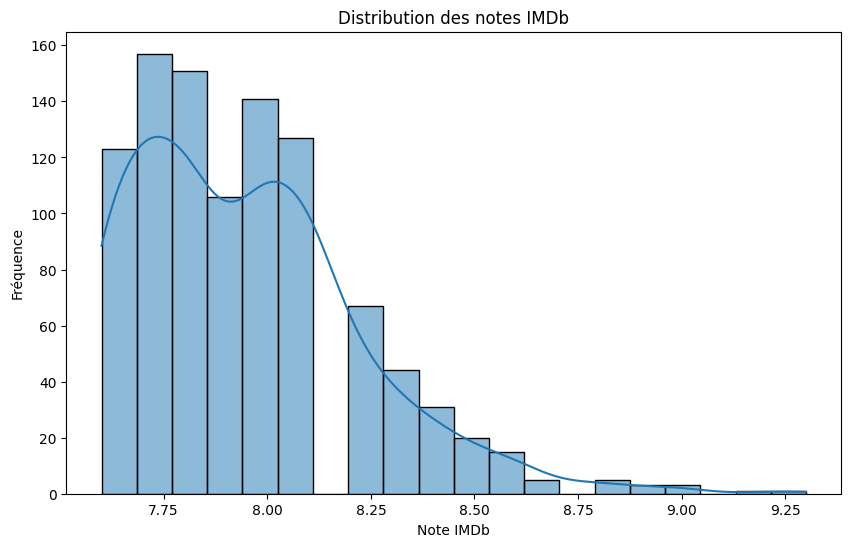

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['IMDB_Rating'], kde=True, bins=20)
plt.title('Distribution des notes IMDb')
plt.xlabel('Note IMDb')
plt.ylabel('Fréquence')
plt.show()

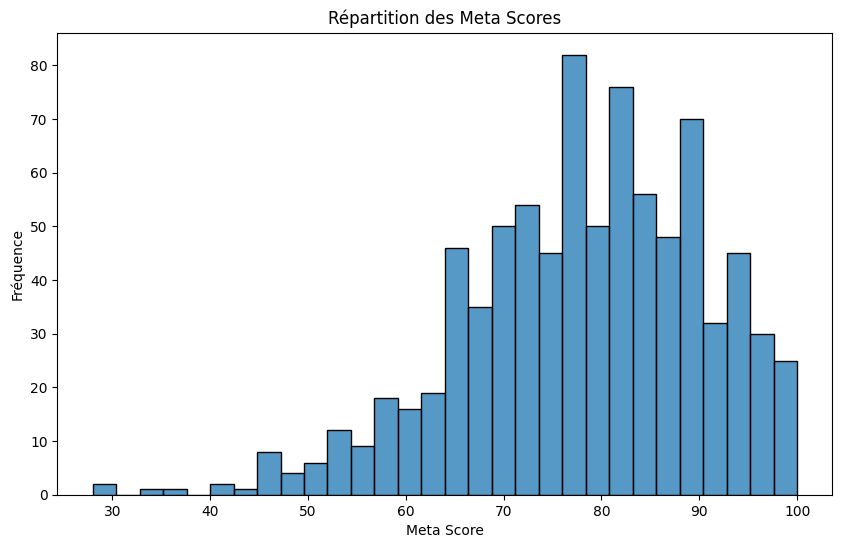

In [109]:
# Répartition des scores Meta
plt.figure(figsize=(10, 6))
sns.histplot(data['Meta_score'], kde=False, bins=30)
plt.title('Répartition des Meta Scores')
plt.xlabel('Meta Score')
plt.ylabel('Fréquence')
plt.show()

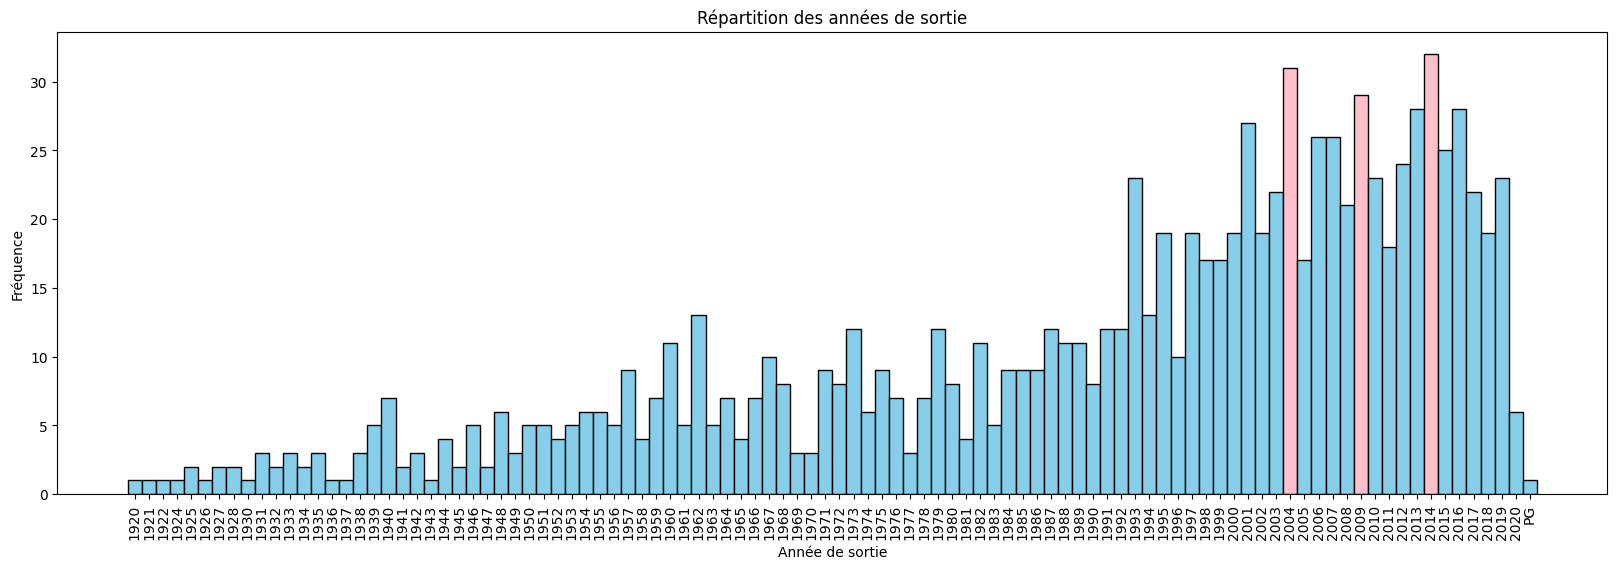

In [110]:
data_sorted = data['Released_Year'].sort_values()

plt.figure(figsize=(20, 6))
ax = sns.histplot(data_sorted, kde=False, bins=30)
for patch in ax.patches:
    if patch.get_height() > 28:
        patch.set_facecolor('pink')
    else:
        patch.set_facecolor('skyblue')
plt.title('Répartition des années de sortie')
plt.xlabel('Année de sortie')
plt.xticks(rotation=90)
plt.ylabel('Fréquence')
plt.show()

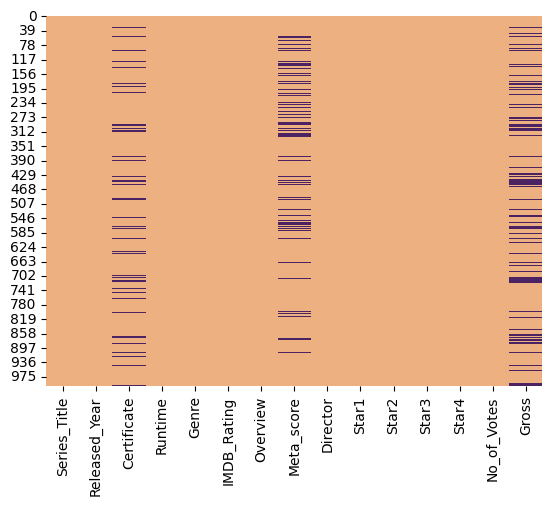

In [111]:
sns.heatmap(data.isnull(), cbar=False, cmap='flare')
plt.show()


In [112]:
data.isnull().sum()


Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [113]:
data['Gross'] = data['Gross'].replace({',': ''}, regex=True) # Enlever les virgules 
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce') # Convertir en chiffres

data['Gross'] = data['Gross'].replace({np.nan: data['Gross'].median()})
data['Meta_score'] = data['Meta_score'].replace({np.nan: data['Meta_score'].median()})
data.drop(columns="Certificate", inplace=True)

data.isnull().sum()


Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

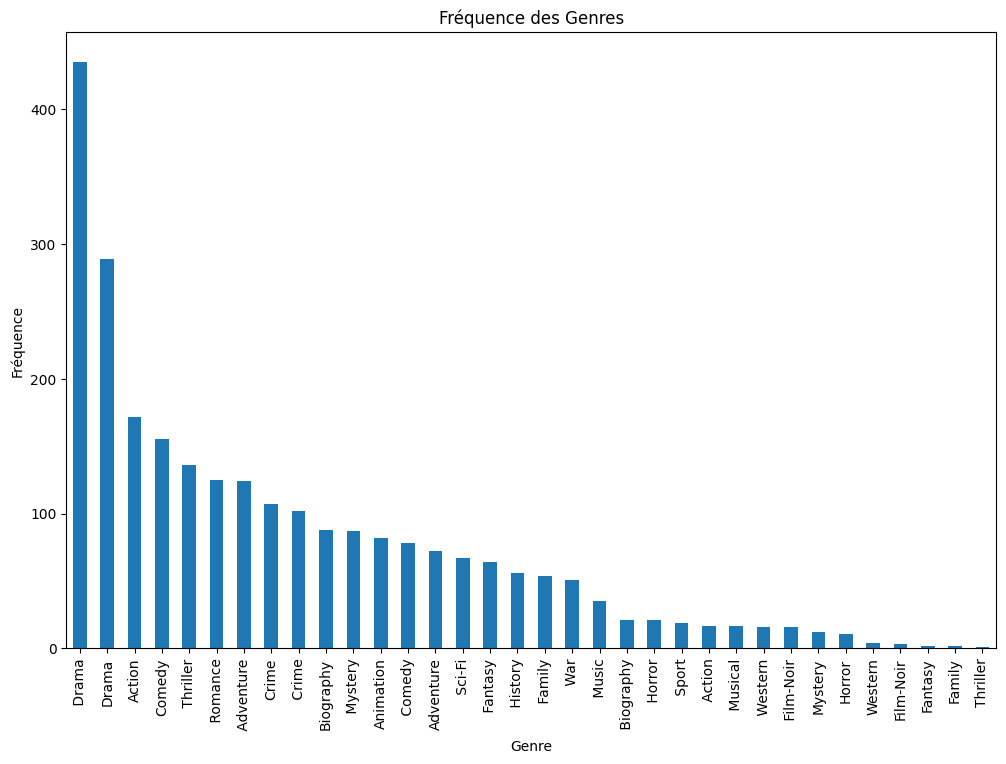

In [114]:
# Séparer les genres et compter leur fréquence
genre_counts = data['Genre'].str.split(',', expand=True).stack().value_counts()

# Visualiser la fréquence des genres
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Fréquence des Genres')
plt.xlabel('Genre')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Multi-Hot Encoding > Créer une colonne pour chaque genre. Multi-hot car un film peut avoir plusieurs genres différents

data['Genre'] = data['Genre'].str.split(', ')

genres = set([genre for sublist in data['Genre'] for genre in sublist])  # Trouver tous les genres uniques
for genre in genres:
    data[genre] = data['Genre'].apply(lambda x: 1 if genre in x else 0)

data = data.drop(columns=['Genre'])  # Supprimer la colonne 'Genre' originale
data.head()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,...,Action,Horror,Comedy,Biography,Fantasy,Music,Animation,Western,Mystery,Musical
0,The Shawshank Redemption,1994,142 min,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,2008,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,1,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,1974,202 min,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,1957,96 min,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,0,0,0,0,0,0,0,0,0,0
